<a href="https://colab.research.google.com/github/inrap8206/bigdata_analyst_certificate_korean/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_%EC%8B%A4%EA%B8%B0_%EC%A3%BC%EC%9A%94%EC%BD%94%EB%93%9C%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 셋업 및 기타

In [ ]:
# 판다스 컬럼열 최대로 출력
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# 경고표시 해제
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# format
x= 12.9293939
print(format(x,'.2f')) # 소수점 둘째자리로 표기(반올림)

12.93


In [ ]:
# Matplib 한글 설정 (재실행 필요 X)
def fix_font():
    # From https://HC.Dle.pw, By Jinseo Kim
    # v1.0.0
    import os
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    os.system("apt-get install -y fonts-nanum")
    os.system("fc-cache -fv")
    mpl.font_manager._rebuild()
    findfont = mpl.font_manager.fontManager.findfont
    mpl.font_manager.findfont = findfont
    mpl.backends.backend_agg.findfont = findfont
    plt.rcParams['font.family'] = "NanumBarunGothic"
    plt.rcParams['axes.unicode_minus'] = False
           
fix_font()

# 통계 검정
 - https://datascienceschool.net/02%20mathematics/09.05%20%EC%82%AC%EC%9D%B4%ED%8C%8C%EC%9D%B4%EB%A5%BC%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EA%B2%80%EC%A0%95.html
 - https://blog.naver.com/ostin1038/222381788634

In [ ]:
# 분산
np.var(x) # 분산
np.std(x) # 표준편차

In [ ]:
# 4분위수 
import numpy as np
np.quantile(df['Global_Sales'], 0.75)

In [ ]:
# 첨도 왜도
from scipy.stats import skew, kurtosis

skew(df['numeric']) #왜도
kurtosis(df['numeric']) # 첨도

In [ ]:
# 상관계수1
corr = df.corr(method = 'pearson') #또는 spearman

# 상관계수2
from scipy import stats
stats.pearsonr(df['1'], df['2']) # 또는 spearmanr
# (상관계수, p-value) 출력, p-value가 0.05보다 작으면 대립가설 채택, 상관 있음


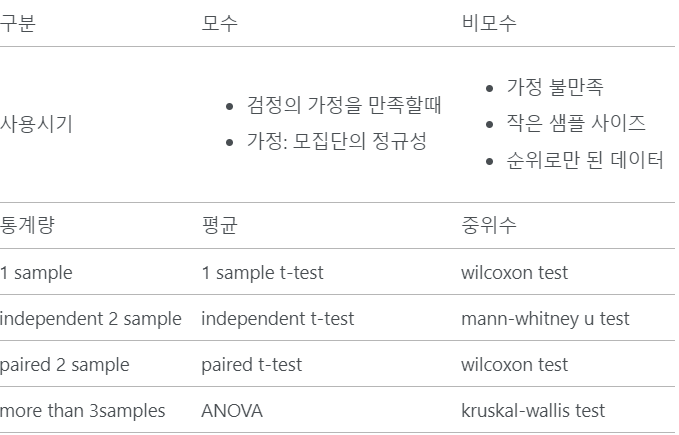

In [ ]:
# 정규성 검정
from scipy import stats

stats.normaltest(data)

stats.kstest(data, "norm") #콜모고로프-스미르노프, 표본수가 많을때
# p-value >= 0.05 : 귀무가설 채택 - 정규분포와 동일
# p-value < 0.05 : 대립가설 채택  - 정규분포가 아님

stats.shapiro(data) #샤피로 테스트, 표본수가 적을때 (50개 미만)
# p-value >= 0.05 : 귀무가설 채택 - 정규분포와 동일
# p-value < 0.05 : 대립가설 채택  - 정규분포가 아님


In [ ]:
# 등분산성 검정  - 두 표본의 평균 검정 전에 사용한다
# p-value >= 0.05 : 귀무가설 채택 - 두 표본의 분산이 동일 = 등분산성 만족 
# p-value < 0.05 : 대립가설 채택  - 두 표본의 분산이 다름 = 등분산성 불만족

from scipy.stats import bartlett, fligner, levene

bartlett(data1, data2) # 표본이 정규성을 따를 때 사용 가능한 등분산 검정법.
fligner(data1, data2)
levene(data1, data2)  # 정규성 관계 없이 사용

In [ ]:
# t-검정, t-test - 집단 간 평균 차이 검정
# p-value >= 0.05 : 귀무가설 채택 - 평균이 같다
# p-value < 0.05 : 대립가설 채택  - 평균이 같지 않다

from scipy import stats

# 1) 한집단 평균 검정
stats.ttest_1samp(data, 알려진평균) # 통계량, p-value 출력

# 2) 두집단 평균 검정
stats.ttest_ind(data1, data2)

# 3) 집단의 전후변화를 검정
stats.ttest_rel(x,y)

In [ ]:
# 카이제곱 검정 - 두개의 집단에 차이가 있는지 검정 (범주형 값 같은 명목척도에 사용)
# p-value >= 0.05 : 귀무가설 채택 - 두 집단간 차이가 없다.
# p-value < 0.05 : 대립가설 채택  - 두 집단간 차이가 있다.
from scipy import stats
stats.chisquare(data1, data2) #통계량, #p-value


#x_train 데이터에서 유입경로와 성별이 연관성이 있는지 가설검정을 실시 
# 귀무가설 : 성별에 따른 유입경로의 차이가 없다. (서로 독립)
# 대립가설 : 성별에 따른 유입경로의 차이가 있다. (서로 독립이 아님)

import scipy.stats as stats 
x_cotigency = pd.crosstab(x_train['성별'],x_train['유입경로']) # 성별에 따른 유입경로 카운트 표 생성 (명목척도->등간척도)
print(stats.chi2_contingency(x_cotigency)[0]) # 통계값
print(stats.chi2_contingency(x_cotigency)[1]) # P.value 
print(stats.chi2_contingency(x_cotigency)[2]) # 자유도 
print(stats.chi2_contingency(x_cotigency)[3]) # 기댓값 

# p.value > 0.05 , 귀무가설기각실패 (귀무가설 참)
# 성별에 따른 유입경로의 차이가 없다. (서로 독립)

In [ ]:
# 혼동행렬, 정확도, 재현율, f1 score
from sklearn.metrics import classification_report
classification_report(y, model1.predict(X))

ANOVA

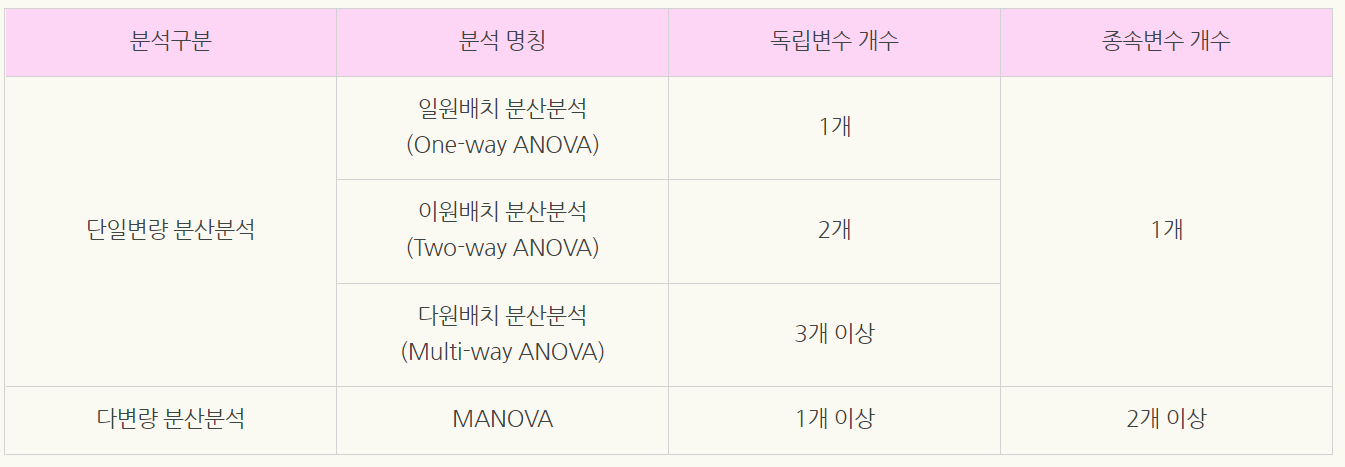

In [ ]:
from scipy import stats
# 2개 이상의 집단의 평균 분포를 비교
# ANOVA 일원배치 분산분석 - 독립변수 1개
# p-value >= 0.05 : 귀무가설 채택 - 그룹간 평균이 차이가 없다
# p-value < 0.05 : 대립가설 채택  - 그룹간 평균이 차이가 있다
stats.f_oneway(data1, data2, data3)


# 크롤링

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

data = requests.get(url)  # 사이트 데이터 가져오기
soup = bs(data.text)  # 텍스트 파싱하여 soup에 저장

# 전처리

In [ ]:
import pandas as pd

y_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/y_train.csv')
X_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/X_train.csv', encoding='euc-kr')
test  = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/X_test.csv',encoding='euc-kr')

# 데이터 병합
train = pd.merge(y_train,X_train)

In [ ]:
# 날짜변환 datetime
df['일자'] = pd.to_datetime(df['일자'])
df['년도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month
df['일'] = df['일자'].dt.day
df['weekend'] = df['일자'].dt.weekday    

In [ ]:
# 중복제거
df.drop_duplicates(subset='item_name', keep='first')

# 필터링

In [ ]:
# N으로 시작하는 데이터 추출
df[df['item_name'].str.startswith('N')].head()

# 결측값 처리

In [ ]:
# 결측값 확인
print('train 결측값 확인\n', train.isnull().sum())
print('\ntest 결측값 확인\n', test.isnull().sum())

In [ ]:
# 결측 컬럼 정보 확인
train['환불금액'].describe()

In [ ]:
# 환불금액 최소값이 0이 아니므로 결측값을 0으로 변환
train['환불금액'] = train['환불금액'].fillna(0)
test['환불금액'] = test['환불금액'].fillna(0)

# 정형데이터 결측치 평균값 대체 예시
# train['numeric'].fillna(data['numeric].median(), inplace=True)

# EDA

In [ ]:
train.describe()

In [ ]:
# 범주형 데이터 확인
print('주구매상품 values\n', train['주구매상품'].value_counts())
print('\n주구매지점 values\n : ', train['주구매지점'].value_counts())

In [ ]:
# 연속형 데이터 분포 확인
print('skew() = ', df['환불금액'].skew())
print(pd.cut(df['환불금액'], bins=15).value_counts(sort=False))

In [ ]:
# 종속변수와 상관관계 파악
train.corr()['gender']

pd.DataFrame({'feature':list(df.columns), 'importance':model.feature_importance_})

# 범주형 데이터 처리

In [ ]:
df.select_dtypes(include=np.number).columns # 수치형 컬럼 선택
df.select_dtypes(include=object).columns # 범주형 컬럼 선택

In [ ]:
train['sex'].replace(['male', 'female'], [0,1], inplace=True)

In [ ]:
# 원핫 인코딩
data = pd.get_dummies(data)

In [ ]:
# label 인코딩
store_to_num = dict(zip(train['주구매지점'].unique(), [0,1,2,3,4,5,6,7,8,9,10,11]))
train['주구매지점'].map(store_to_num)

In [ ]:
label_dic = {'G':7, 'E':6, 'F':5, 'H':4, 'D':3, 'I':2, 'J':1}
df['colorLabel'] = df['color'].map(label_dic)

# Feature Engineering

In [ ]:
# 음수 데이터 삭제
train = train[train['총구매액']>0]

In [ ]:
# 파생변수 생성
train['최초구매액'] = train['총구매액'] + train['환불금액'] + 1
train['최대구매액비율'] = train['최대구매액']/train['최초구매액']
train['환불금액비율'] = train['환불금액']/train['최초구매액']
train['총구매건수'] = train['내점일수']*train['내점당구매건수']


test['최초구매액'] = test['총구매액'] + test['환불금액'] + 1
test['최대구매액비율'] = test['최대구매액']/test['최초구매액']
test['환불금액비율'] = test['환불금액']/test['최초구매액']
test['총구매건수'] = test['내점일수']*test['내점당구매건수']

In [ ]:
from sklearn.decomposition import PCA
train_pca = pca.fit_transform(train_scaled) # pca전 Standardscaler 변환 필요
pca = PCA(n_components=5) # 5개 주성분으로 차원 축소
a = pca.explained_variance_ratio_ # 30개 주성분의 분산비율 (설명력 높은 순)
a[0] + a[1] + a[2] # 세번째 주성분까지의 누적분산 비율

# PCA  및 군집화

In [ ]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=75) 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# 주성분간 유클리드 거리 계산
def dist(x,y):
  return np.sqrt(np.sum((x - y) ** 2))

print(dist(df3['com1'], df3['com2']))

In [ ]:
# PCA 주성분 군집화
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')  # n_clusters 군집수, affinity 거리측정방법, linkage 연결법
df['group'] = cluster.fit_predict(df5)
print( df5['group'].value_counts())

In [ ]:
# 각종 거리구하기
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances, manhattan_distances

# 모델 검증

In [ ]:
# test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =10)

# 검증
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_pred, y_test)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
df_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(df_clf, data, label, scoring='accuracy', cv=5)
print('교차 검증별 정확도:', scores)
print('평균 검증 정확도:', mean(scores))

# 하이퍼파라미터 튜닝

In [ ]:
class_weight='balanced' # 불균형 데이터 가중치 설정
criterion='gini' or 'entropy'
n_estimators= 숫자 # 분류기 수
max_depth = 가지 최대 깊이

# 제출

In [ ]:
model.fit(X_train, y_train)
y_test = model.predict_proba(X_test)
submission = pd.DataFrame({'custid': test.cust_id, 'gender' : y_test[:,1]})
submission.to_csv('수험번호.csv', index=False)